#   Handsign Recognition

## Import Library

<a id = "import_Library"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>

For this project, we have implemented these libraries:

|library      |Functions/Usage    |
|:--|:--|
|numpy          |- uses in creating arrays |
|               |- performs operations in array.etc|
|skimage        |- use in image processing (greyscale, rescaling) |
|matplotlib     |- library use for ploting |
|torch          |- used to work with tensor or other deep learning task |
|os             |- library to call upon os system|
|time           |- access time in system | 
|sklearn        |- library for model selection or postprocessing task such as confusion matrix |
|torchvision    |- used to work with dataset, such as dataloader  |
|PIL            |- work with images   |
|cv2            |- work with more advanced image preprocessing task such as (blurring)  |


In [36]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import copy
from PIL import Image  # Add this line to import the 'Image' class
import glob
from skimage import io 
import matplotlib.image as mpimg
import random
import cv2
import time
import matplotlib.pyplot as plt

import torch
from torchvision import datasets,models, transforms
from torch.utils.data import DataLoader
from torchvision import utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data
from torch.optim import lr_scheduler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)




cuda


## Raw Data Loading and Size of Data


In [2]:
data = r'C:\Users\PC\Desktop\Hand Recognition\data'

dataset = datasets.ImageFolder(data,transform = transforms.ToTensor())

# Get the number of images in the dataset
num_images = len(dataset)

print(f'The number of images in the dataset is: {num_images}')

The number of images in the dataset is: 3000


In [3]:
data_dir = data  
class_sizes = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_sizes[class_name] = len(os.listdir(class_path))

print(class_sizes)

{'5': 300, '7': 300, 'bad': 300, 'c': 300, 'good': 300, 'o': 300, 'ok': 300, 'punch': 300, 'three': 300, 'yeah': 300}


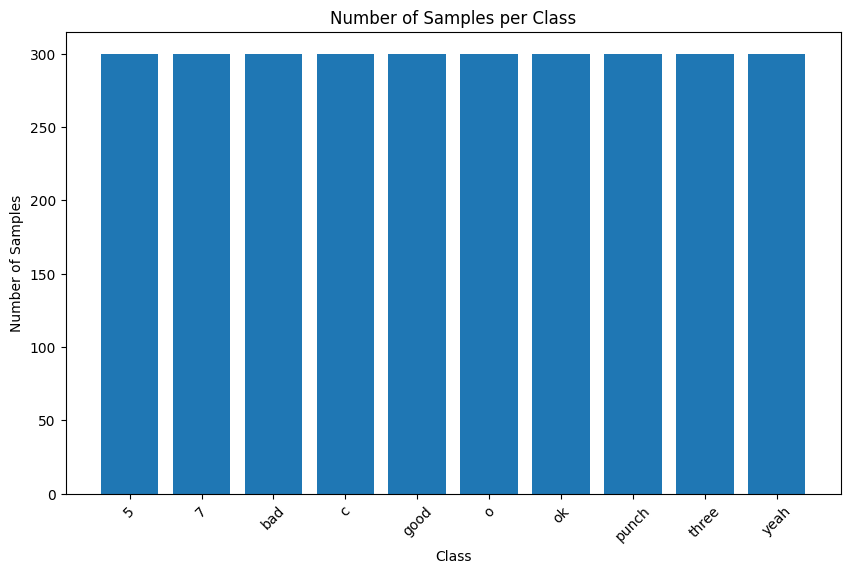

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_sizes.keys(), class_sizes.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.show()

# Visualise Data

['5', '7', 'bad', 'c', 'good', 'o', 'ok', 'punch', 'three', 'yeah']
C:\Users\PC\Desktop\Hand Recognition\data\5


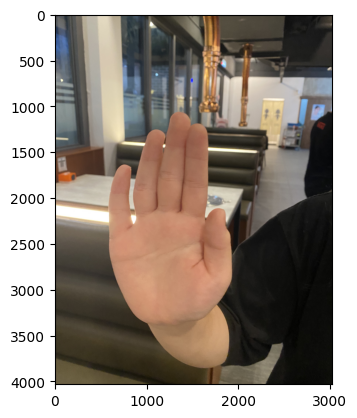

In [5]:
classes = dataset.classes # get the list of classes
print(classes)

handsign_path = os.path.join(data, classes[0]) # get the path to the first class folder
print(handsign_path)
handsign_images = os.listdir(handsign_path) # get the list of images in the first class folder
handsign_image = handsign_images[10] # randomly get one image in the first class folder
handsign_image_path = os.path.join(handsign_path, handsign_image) # create the path to the image
#print(handsign_image_path)


img = io.imread(handsign_image_path) # read the image data into an array
i,(im1)= plt.subplots(1) # Create subplots
i.set_figwidth(10) # Set figure width to 10
im1.imshow(img) # Display the image
plt.axis('on') # Turn off axis labels
plt.show()




## Rename Data

In [6]:
# function to get the counter value from the counter.txt file
def get_counter(file_path):
    # Read the counter value from a file
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            counter = int(file.read())
    else:
        counter = 1 # Set the counter to 1 if the file doesn't exist
    return counter 

# function to update the counter value in the counter.txt file
def update_counter(file_path, counter):
    # Update the counter value in the file
    with open(file_path, 'w') as file: # Open the file in write mode
        file.write(str(counter)) # Write the counter value to the file in str format

# Function to rename multiple files
def rename_images(root_dir, counter_file):
    for folder_name in os.listdir(root_dir): # Iterate through the folders in the root directory
        folder_path = os.path.join(root_dir, folder_name) # Create the path to the folder
        print(f'Processing folder: {folder_path}')
        if os.path.isdir(folder_path): # Check if the current item is a folder
            # Get the counter for the current folder
            counter = get_counter(counter_file) 

            for filename in os.listdir(folder_path): # Iterate through the files in the folder
                print(f'Processing file: {filename}')
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')): # Filter only the image files
                    old_path = os.path.join(folder_path, filename) # Create image path
                    print(f'Renaming: {old_path}')
                    # Extract the file extension
                    _,extension = os.path.splitext(filename)

                    #filename="IMG"
                    # Use the counter as a suffix for each image
                    filename = f'IMG_{counter}{extension}'

                    # create the new path to the image
                    new_path = os.path.join(folder_path, filename)

                    os.rename(old_path, new_path) # Rename the file

                    # indication of successfull renaming
                    print(f'Renamed: {old_path} to {new_path}')

                    counter += 1  # Increment the counter for the next iteration

            # Save the updated counter value for the current folder
            update_counter(counter_file, counter)

if __name__ == "__main__":
    # Set the paths to the folders containing the images
    root_directory = data
    
    # Set the path to the counter file
    counter_file_path = r'C:\Users\PC\Desktop\Hand Recognition\counter.txt'
    # for i in range(1,4):
    #     folder_path = eval(f'root_directory{str(i)}') # Set the path to the folder containing the images
    #     rename_images(folder_path, counter_file_path) # function call

    rename_images(root_directory, counter_file_path) # function call
    
    


Processing folder: C:\Users\PC\Desktop\Hand Recognition\data\5
Processing file: IMG_7689.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7689.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7689.JPG to C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_1.JPG
Processing file: IMG_7690.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7690.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7690.jpg to C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_2.jpg
Processing file: IMG_7691.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7691.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7691.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_3.jpeg
Processing file: IMG_7692.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7692.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_7692.jpg to C:\Users\PC\Desktop\Hand Recognition\data\5\IMG_4.jpg
Processing file: IMG_7693.jpeg
Renaming: C:\Users\PC\

Renamed: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8294.jpg to C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_606.jpg
Processing file: IMG_8295.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8295.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8295.jpg to C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_607.jpg
Processing file: IMG_8296.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8296.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8296.JPG to C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_608.JPG
Processing file: IMG_8297.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8297.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8297.JPG to C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_609.JPG
Processing file: IMG_8298.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8298.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\bad\IMG_8298.JPG to C:\Users\PC\Deskt

Renamed: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8889.jpg to C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_1201.jpg
Processing file: IMG_8890.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8890.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8890.jpg to C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_1202.jpg
Processing file: IMG_8891.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8891.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8891.JPG to C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_1203.JPG
Processing file: IMG_8892.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8892.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8892.jpg to C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_1204.jpg
Processing file: IMG_8893.JPG
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8893.JPG
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\good\IMG_8893.JPG to 

Renamed: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9427.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_1739.jpeg
Processing file: IMG_9428.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9428.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9428.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_1740.jpeg
Processing file: IMG_9429.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9429.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9429.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_1741.jpeg
Processing file: IMG_9430.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9430.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9430.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_1742.jpeg
Processing file: IMG_9431.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9431.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\o\IMG_9431.jpeg to C:\Users\PC\Desktop\Ha

Renamed: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9884.JPG to C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_2285.JPG
Processing file: IMG_9885.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9885.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9885.jpg to C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_2286.jpg
Processing file: IMG_9886.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9886.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9886.jpg to C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_2287.jpg
Processing file: IMG_9887.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9887.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9887.jpg to C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_2288.jpg
Processing file: IMG_9888.jpg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG_9888.jpg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\punch\IMG

Renamed: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10507.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_2819.jpeg
Processing file: IMG_10508.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10508.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10508.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_2820.jpeg
Processing file: IMG_10509.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10509.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10509.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_2821.jpeg
Processing file: IMG_10510.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10510.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10510.jpeg to C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_2822.jpeg
Processing file: IMG_10511.jpeg
Renaming: C:\Users\PC\Desktop\Hand Recognition\data\yeah\IMG_10511.jpeg
Renamed: C:\Users\PC\Desktop\Hand Recognitio

# Data Resize

In [7]:
# apply transformation (resize and convert to tensor) to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

data = r'C:\Users\PC\Desktop\Hand Recognition\data' 
dataset = datasets.ImageFolder(data, transform=transform)
dataloader = DataLoader(dataset, shuffle=False)
output_folder = r'C:\Users\PC\Desktop\Hand Recognition\resize'
os.makedirs(output_folder, exist_ok=True)

# Loop through the images in the dataset
for idx, (image, label) in enumerate(dataloader):
    original_filename = dataset.imgs[idx][0]
    filename = os.path.basename(original_filename)
    output_path = os.path.join(output_folder, dataset.classes[label[0]], filename)

    # Create the folder if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Convert the image values from [0, 1] to [0, 255] and save, as toTensor() converts the image to [0, 1]
    utils.save_image(image * 255, output_path)
    


# Data Normalization

## Calculation of Mean and Standard Deviation

In [8]:
# Create the dataset
dataset = datasets.ImageFolder(root=output_folder, transform=transforms.ToTensor())

# Create the dataloader
dataloader = DataLoader(dataset, shuffle=False)

# initialize the variables to store the sum and sum of squares of pixel values for each channel
sum_train=torch.zeros(3,dtype=torch.float32)
sum_sq_train= torch.zeros(3,dtype=torch.float32)

# Loop through the images in the dataset
for idx, (image, label) in enumerate(dataloader):
    # get the sum and sum of squares of pixel values
    sum_train += torch.sum(image,dim=(0,2,3))   # summing up pixels values in each channel
    sum_sq_train += torch.sum(image ** 2,dim=(0,2,3))  # summing up squares of pixels values in each channel

print(f'The sum of pixel values in the dataset is: {sum_train}')
print(f'The sum of squares of pixel values in the dataset is: {sum_sq_train}')
print("")
# calculate the mean and standard deviation across every channel
mean_train = sum_train / (len(dataset) * 256 * 256) # *256 because we resized the images to 256x256
std_train = torch.sqrt((sum_sq_train / (len(dataset) * 256 * 256 ))-mean_train**2) 

# every value in the tensor output represents the mean and standard deviation for each channel
print(f'The mean of the dataset is: {mean_train}')
print(f'The standard deviation of the dataset is: {std_train}')

# the mean and standard deviation for the training datasets will be used for the validation and test datasets





The sum of pixel values in the dataset is: tensor([1.9630e+08, 1.9654e+08, 1.9648e+08])
The sum of squares of pixel values in the dataset is: tensor([1.9626e+08, 1.9652e+08, 1.9644e+08])

The mean of the dataset is: tensor([0.9984, 0.9996, 0.9994])
The standard deviation of the dataset is: tensor([0.0369, 0.0163, 0.0211])


# Data Augmentation
## 5 directions of Augmentation

In [9]:
# initialize the path to store the augmented images
normalise = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_resized_normalized2'
crop = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_transformed_crop1'
horiflip = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_transformed_horiflip2'
rot = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_transformed_rot2'
contrast = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_transformed_contrast2'


In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train)
])

transform_crop = transforms.Compose([
    transforms.ToTensor(),
    transforms.CenterCrop((224, 224)), # crop the image to 224x224
    transforms.Normalize(mean_train, std_train)
    
])

transform_horiflip = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5), # flip the image horizontally with a probability of 0.5
    transforms.Normalize(mean_train, std_train)
    
])

transform_rot = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(30), # rotate the image by 30 degrees
    transforms.Normalize(mean_train, std_train)
    
])

transform_contrast = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomAutocontrast(p=0.5), # adjust the contrast of the image with a probability of 0.5
    transforms.Normalize(mean_train, std_train)
    
])


# Load Data to DataLoader

In [11]:
dataset_normalise = datasets.ImageFolder(output_folder, transform=transform)
dataloader_normalise = DataLoader(dataset_normalise, shuffle=False)
output_normalise = normalise
os.makedirs(output_folder, exist_ok=True)

dataset_crop = datasets.ImageFolder(output_folder, transform=transform_crop)
dataloader_crop = DataLoader(dataset_crop, shuffle=False)
output_crop = crop
os.makedirs(output_folder, exist_ok=True)

dataset_horiflip = datasets.ImageFolder(output_folder, transform=transform_horiflip)
dataloader_horiflip = DataLoader(dataset_horiflip, shuffle=False)
output_horiflip = horiflip
os.makedirs(output_folder, exist_ok=True)

dataset_rot = datasets.ImageFolder(output_folder, transform=transform_rot)
dataloader_rot = DataLoader(dataset_rot, shuffle=False)
output_rot = rot
os.makedirs(output_folder, exist_ok=True)

dataset_contrast = datasets.ImageFolder(output_folder, transform=transform_contrast)
dataloader_contrast = DataLoader(dataset_contrast, shuffle=False)
output_contrast = contrast
os.makedirs(output_folder, exist_ok=True)



In [12]:
for idx, (image, label) in enumerate(dataloader_normalise):
        # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_normalise, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    utils.save_image(image, output_path) 
    


In [13]:
for idx, (image, label) in enumerate(dataloader_crop):
        # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_crop, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    utils.save_image(image, output_path) 

In [14]:
for idx, (image, label) in enumerate(dataloader_horiflip):
        # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_horiflip, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    utils.save_image(image, output_path) 

In [15]:
for idx, (image, label) in enumerate(dataloader_rot):
        # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_rot, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    utils.save_image(image, output_path) 
    
    


In [16]:
for idx, (image, label) in enumerate(dataloader_contrast):
    # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_contrast, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    utils.save_image(image, output_path) 
    
    


In [17]:
# define a class to apply gaussian blur on the image
class GaussianBlur(object):
    def __init__(self, radius):
        self.radius = radius

    # apply the gaussian blur on the rgb channels
    def __call__(self, img):
        img = np.array(img) # convert the image to numpy array
        img[:, :, 0] = cv2.GaussianBlur(img[:, :, 0], (self.radius, self.radius), 0) # apply gaussian blur on the red channel
        img[:, :, 1] = cv2.GaussianBlur(img[:, :, 1], (self.radius, self.radius), 0) # apply gaussian blur on the green channel
        img[:, :, 2] = cv2.GaussianBlur(img[:, :, 2], (self.radius, self.radius), 0) # apply gaussian blur on the blue channel
        return img

transform_train_blur = transforms.Compose([
    transforms.ToTensor(),
    GaussianBlur(radius=5),
    transforms.Normalize(mean_train, std_train)
    
])

root_directory1=output_folder

output_folder1 = r'C:\Users\PC\Desktop\Hand Recognition\augment\dataset_transformed_blur2'


dataset = datasets.ImageFolder(root=root_directory1, transform=transform)


output_folder = output_folder1
os.makedirs(output_folder, exist_ok=True)

# Use DataLoader to store the images 
dataloader = DataLoader(dataset, shuffle=False)


# Loop through the images in the dataloader
for idx, (image, label) in enumerate(dataloader):
    # Get the original filename from the dataset
    original_filename = dataset.imgs[idx][0]

    # transform the image
    # permute the dimensions from (3, 224, 224) to (224, 224, 3) for later use in model training, and convert to numpy array
    #image = image.squeeze().permute(1, 2, 0).toTensor()

    # Get the filename from the original path,eg IMG_1.jpg, IMG_2.jpg
    filename = os.path.basename(original_filename)
    # Create the output path
    output_path = os.path.join(output_folder, dataset.classes[label[0]], filename)

    # Save the image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image
    utils.save_image(image, output_path) 
    #Image.fromarray((image * 255).astype('uint8')).save(output_path)
        


# Augmented Dataset Loading

In [2]:
train_path = r'C:\Users\PC\Desktop\Hand Recognition\Augmented\train'
val_path = r'C:\Users\PC\Desktop\Hand Recognition\Augmented\val'
test_path = r'C:\Users\PC\Desktop\Hand Recognition\Augmented\test'



In [3]:
# Create datasets and data loaders
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])



In [4]:
# Create datasets and data loaders
train_dataset = datasets.ImageFolder(train_path, transform=transform)
val_dataset = datasets.ImageFolder(val_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)



In [21]:
print(f'Size of training dataset: {len(train_dataset)}')
print(f'Size of validation dataset: {len(val_dataset)}')
print(f'Size of testing dataset: {len(test_dataset)}')

Size of training dataset: 14700
Size of validation dataset: 4200
Size of testing dataset: 2100


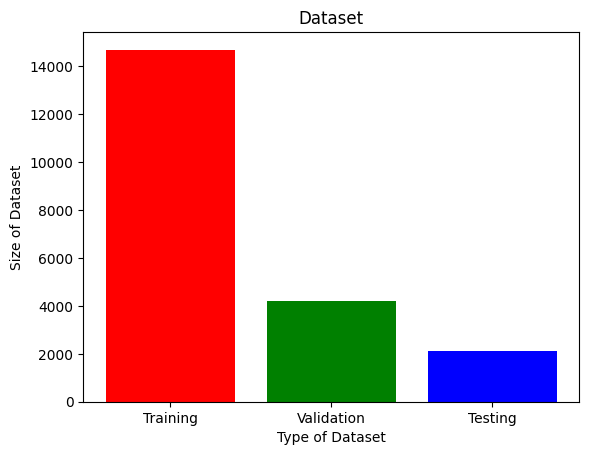

In [22]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [len(train_dataset), len(val_dataset), len(test_dataset)] 
  
# labels for bars 
tick_label = ['Training', 'Validation', 'Testing'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','blue']) 
  
# naming the x-axis 
plt.xlabel('Type of Dataset') 
# naming the y-axis 
plt.ylabel('Size of Dataset') 
# plot title 
plt.title('Dataset') 
  
# function to show the plot 
plt.show() 

{'5': 1470, '7': 1470, 'bad': 1470, 'c': 1470, 'good': 1470, 'o': 1470, 'ok': 1470, 'punch': 1470, 'three': 1470, 'yeah': 1470}


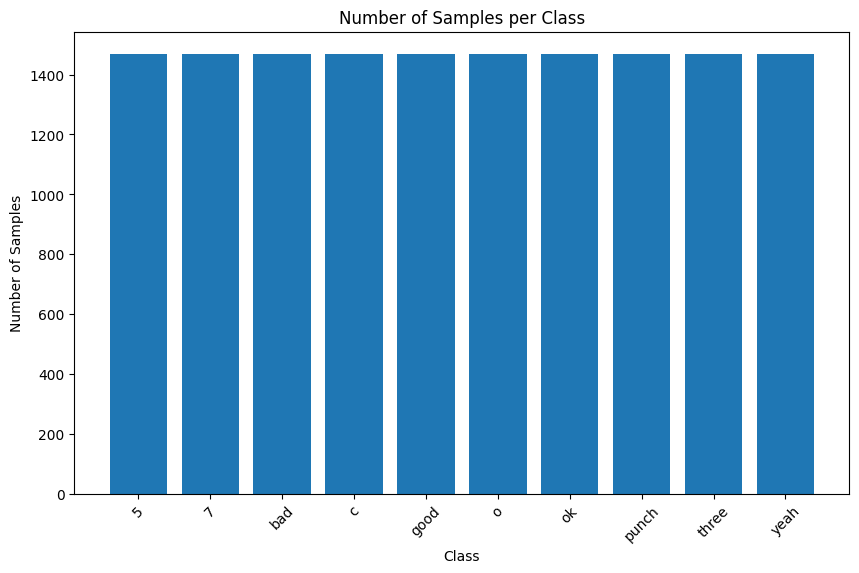

In [23]:
data_dir = train_path  # Replace with your data directory
class_sizes = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_sizes[class_name] = len(os.listdir(class_path))

print(class_sizes)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_sizes.keys(), class_sizes.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.show()

{'5': 420, '7': 420, 'bad': 420, 'c': 420, 'good': 420, 'o': 420, 'ok': 420, 'punch': 420, 'three': 420, 'yeah': 420}


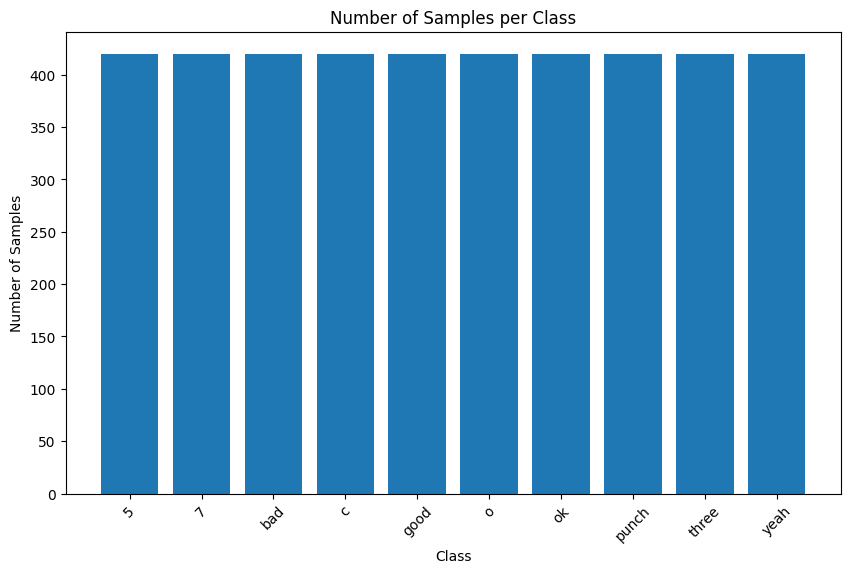

In [24]:
data_dir = val_path  # Replace with your data directory
class_sizes = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_sizes[class_name] = len(os.listdir(class_path))

print(class_sizes)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_sizes.keys(), class_sizes.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.show()

{'5': 210, '7': 210, 'bad': 210, 'c': 210, 'good': 210, 'o': 210, 'ok': 210, 'punch': 210, 'three': 210, 'yeah': 210}


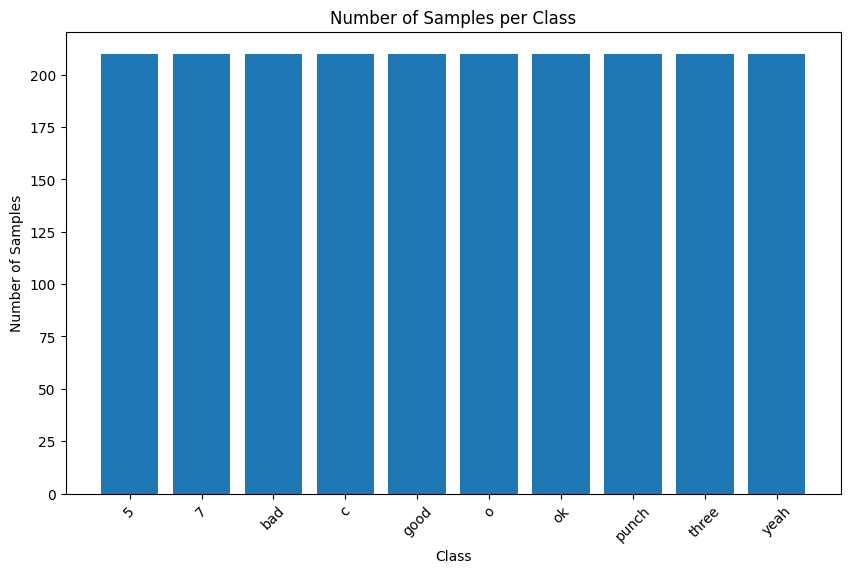

In [25]:
data_dir = test_path  # Replace with your data directory
class_sizes = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_sizes[class_name] = len(os.listdir(class_path))

print(class_sizes)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_sizes.keys(), class_sizes.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45)
plt.show()

# Model Training and Testing

Due to 3 models were used in this project which are CNN self defined model,Resnet pretrained model and VGG pretrained model.Moreover, they had a hard requiring on GPU and Memory.Thus,there was a function which is torch.save() under each model training cell.This function can handle on saving trained model.It also could help to saving the best model.Thus, we can skip to run the training cell when uing torch.save in case the hardware can't handle the model progress.

# CNN

## Dataset of CNN
### 3 layer more suitable on 50 size of image

In [21]:
# Create datasets and data loaders
transform = transforms.Compose([
    transforms.Resize((50, 50)),
    transforms.ToTensor(),
])

# Create datasets and data loaders
train_cnn = datasets.ImageFolder(train_path, transform=transform)
val_cnn = datasets.ImageFolder(val_path, transform=transform)
test_cnn = datasets.ImageFolder(test_path, transform=transform)

batch_size = 32
train_cnn_loader = DataLoader(dataset=train_cnn, batch_size=batch_size, shuffle=True)
val_cnn_loader = DataLoader(dataset=val_cnn, batch_size=batch_size)
test_cnn_loader = DataLoader(dataset=test_cnn, batch_size=batch_size)

In [37]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Convolutional Layer 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 6 * 6, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, num_classes)

        # Dropout
        self.dropout2 = nn.Dropout(0.3)

        # Apply Weights Initialization
        self._initialize_weights()

    def forward(self, x):
        # Applying Convolutional Layers and Pooling Layers
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Flattening the output for the fully connected layers
        x = x.view(-1, 128 * 6 * 6)

        # Fully connected layer with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.xavier_normal_(m.weight)
                init.constant_(m.bias, 0)

In [38]:
# Instantiate the model, loss function, and optimizer
model = CNN(10).to(device)  

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0005)  
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

start_time = time.time()
num_epochs = 25
t_l = []
t_a = []
v_l = []
v_a = []
t = []
#c_t = []
c_e = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    start = time.time()
    for inputs, labels in train_cnn_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_cnn_loader)
    t_l.append(train_loss)
    train_accuracy = train_correct / train_total
    t_a.append(train_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%")
    end = time.time()
    e = (end - start)/60
    t.append(e)
    elasped = "{:.2f}".format(e)
    
    
    scheduler.step()
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_cnn_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_cnn_loader)
        v_l.append(val_loss)
        val_accuracy = val_correct / val_total
        v_a.append(val_accuracy)
        print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")
        print(f"Training time: {elasped} minutes")
        print("")

        x = epoch + 1
        c_e.append(x)
        if val_loss < 0.85:
            break
        

end_time = time.time() 
cnn_elasped = (end_time - start_time)/60
a = "{:.2f}".format(cnn_elasped)
#c_t.append(a)
print(f"Total training time: {a} minutes")
print("Training completed")

#torch.save(t_l, 'cnn_train.pt')
#torch.save(t_a, 'cnn_acc.pt')
#torch.save(v_l, 'cnn_val.pt')
#torch.save(v_a, 'cnn_val_acc.pt')
#torch.save(t, 'cnn_time.pt')
#torch.save(c_t, 'cnn_total.pt')
#torch.save(c_e, 'cnn_epoch.pt')


torch.save(model.state_dict(), 'cnn_model.pt')
print("Model Saved")

Epoch 1/25, Training Loss: 2.4190, Training Accuracy: 23.75%
Epoch 1/25, Validation Loss: 1.8066, Validation Accuracy: 33.88%
Training time: 0.22 minutes

Epoch 2/25, Training Loss: 1.6168, Training Accuracy: 42.25%
Epoch 2/25, Validation Loss: 1.4044, Validation Accuracy: 49.67%
Training time: 0.24 minutes

Epoch 3/25, Training Loss: 1.3194, Training Accuracy: 52.64%
Epoch 3/25, Validation Loss: 1.3269, Validation Accuracy: 52.57%
Training time: 0.23 minutes

Epoch 4/25, Training Loss: 1.1572, Training Accuracy: 58.31%
Epoch 4/25, Validation Loss: 1.1521, Validation Accuracy: 60.95%
Training time: 0.24 minutes

Epoch 5/25, Training Loss: 1.0293, Training Accuracy: 62.03%
Epoch 5/25, Validation Loss: 1.3193, Validation Accuracy: 57.17%
Training time: 0.24 minutes

Epoch 6/25, Training Loss: 0.9371, Training Accuracy: 64.98%
Epoch 6/25, Validation Loss: 1.0711, Validation Accuracy: 66.69%
Training time: 0.24 minutes

Epoch 7/25, Training Loss: 0.8590, Training Accuracy: 67.67%
Epoch 7/2

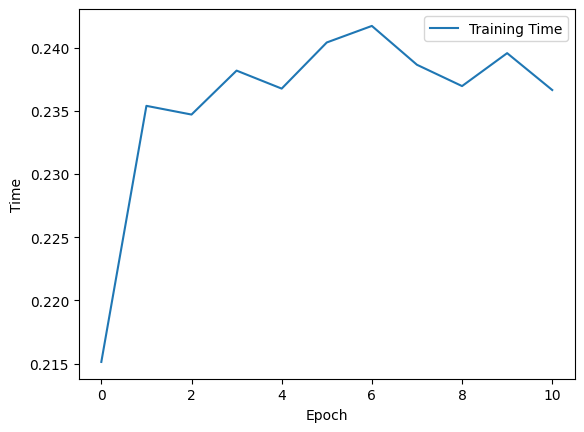

In [148]:
plt.plot(t, label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.legend()
plt.show()

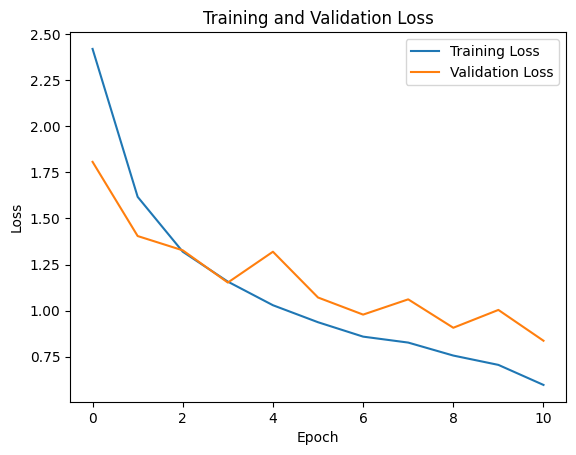

In [149]:
plt.plot(t_l, label='Training Loss')
plt.plot(v_l, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.legend()
plt.show()

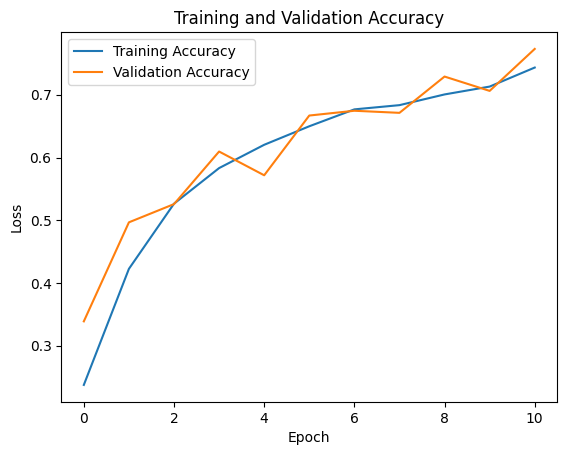

In [150]:
plt.plot(t_a, label='Training Accuracy')
plt.plot(v_a, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.legend()
plt.show()

In [159]:
# Test the model on the test set
model = CNN(10).to(device)
model.load_state_dict(torch.load('cnn_model.pt'))
model.eval()
correct = 0
total = 0
y_pred = []
y_true = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_cnn_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        y_probs.append(probabilities.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

y_probs = np.concatenate(y_probs, axis=0)
cnn_accuracy = correct / total * 100
print(f"Test Accuracy: {cnn_accuracy :.2f}%")


Test Accuracy: 80.38%


In [160]:
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

cnn = pd.DataFrame({
    "CNN": ["Accuracy","Precision", "Recall", "F1 Score"],
    "Value": [cnn_accuracy/100,precision, recall, f1]
})

# Display the DataFrame
print(cnn)

         CNN     Value
0   Accuracy  0.803810
1  Precision  0.803433
2     Recall  0.803810
3   F1 Score  0.797613


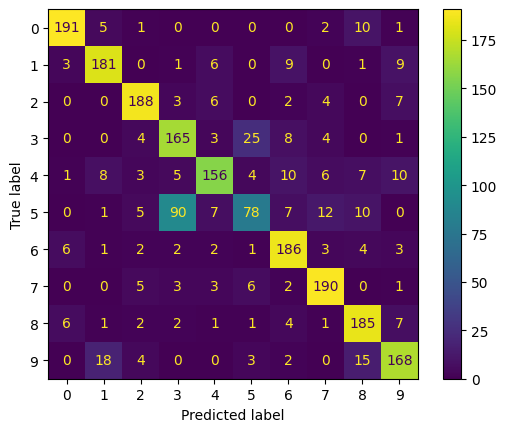

In [161]:
cm = confusion_matrix(y_true, y_pred)

ConfusionMatrixDisplay(cm).plot()

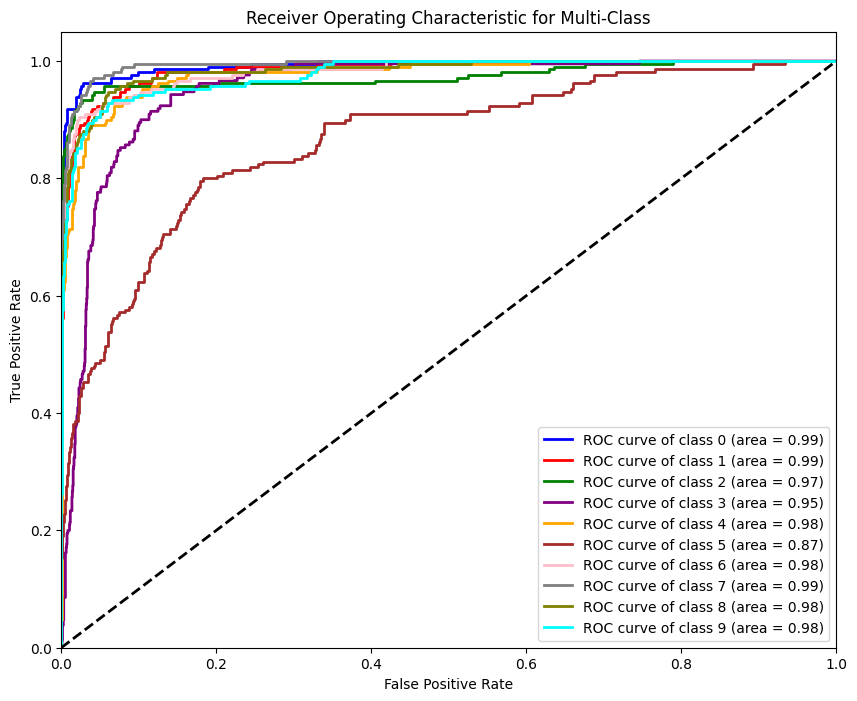

In [162]:
n_classes = 10
y_true_binary = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


In [105]:
#target = torch.load('cnn_time.pt')
#cnn_train_loss = torch.load('cnn_train.pt')
#cnn_train_acc = torch.load('cnn_acc.pt')
#cnn_val_loss = torch.load('cnn_val.pt')
#cnn_val_acc = torch.load('cnn_val_acc.pt')
#cnn_time = torch.load('cnn_total.pt')
#cnn_epoch = torch.load('cnn_epoch.pt')

In [106]:
#cnn_train_loss = torch.load('cnn_train.pt')
#plt.plot(cnn_train_loss, label='Training Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

# Plot training accuracy
#cnn_train_acc = torch.load('cnn_acc.pt')
#plt.plot(cnn_train_acc, label='Training Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [107]:
#plt.plot(cnn_val_loss, label='Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

# Plot training accuracy
#plt.plot(cnn_val_acc, label='Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

# Resnet

In [138]:
# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)


model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)




C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [139]:
# Training the model
num_epochs = 15
train_losses = []
val_losses = []
res_acc = []
val_acc = []
r = []
#r_t = []
r_e = []

start_time = time.time()
for epoch in range(num_epochs):
    start = time.time()
    model.train()
    running_loss = 0.0
    train_total, train_correct = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_acc = 100 * train_correct / train_total
    res_acc.append(train_acc)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f},Train Acc:{train_acc}%')
    end = time.time()
    # Evaluate the model
    model.eval()
    running_loss = 0.0
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = running_loss / len(val_loader)
        val_losses.append(val_loss)
        val_accuracy = 100 * correct / total
        val_acc.append(val_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')
    
    e = (end - start)/60
    r.append(e)
    res_elasped = "{:.2f}".format(e)
    print(f"Training time: {res_elasped} minutes")
    
    
    
    y = epoch+1
    r_e.append(y)
    print("")
    if val_loss < 0.7:
        break
        
end_time = time.time() 
res_elasped = (end_time - start_time)/ 60
b = "{:.2f}".format(res_elasped)
#r_t.append(b)
print(f'Time Taken: {b} minutes')
print("Done training")

#torch.save(train_losses, 'res_train.pt')
#torch.save(res_acc, 'res_acc.pt')
#torch.save(val_losses, 'res_val.pt')
#torch.save(val_acc, 'res_val_acc.pt')
#torch.save(r, 'res_time.pt')
#torch.save(r_t, 'res_total.pt')
#torch.save(r_e, 'res_epoch.pt')

torch.save(model.state_dict(), 'res_model.pt')
print("Model Saved")

Epoch [1/15], Train Loss: 1.0209,Train Acc:65.78231292517007%
Epoch [1/15], Val Loss: 1.1028, Accuracy: 62.55%
Training time: 1.53 minutes

Epoch [2/15], Train Loss: 0.6418,Train Acc:79.48979591836735%
Epoch [2/15], Val Loss: 1.6342, Accuracy: 55.33%
Training time: 1.51 minutes

Epoch [3/15], Train Loss: 0.5481,Train Acc:82.5578231292517%
Epoch [3/15], Val Loss: 0.9170, Accuracy: 71.36%
Training time: 1.52 minutes

Epoch [4/15], Train Loss: 0.4603,Train Acc:85.74829931972789%
Epoch [4/15], Val Loss: 0.8066, Accuracy: 72.60%
Training time: 1.51 minutes

Epoch [5/15], Train Loss: 0.4176,Train Acc:87.06802721088435%
Epoch [5/15], Val Loss: 0.7636, Accuracy: 75.31%
Training time: 1.52 minutes

Epoch [6/15], Train Loss: 0.3715,Train Acc:88.49659863945578%
Epoch [6/15], Val Loss: 0.7527, Accuracy: 75.29%
Training time: 1.51 minutes

Epoch [7/15], Train Loss: 0.3308,Train Acc:89.47619047619048%
Epoch [7/15], Val Loss: 0.8827, Accuracy: 73.48%
Training time: 1.52 minutes

Epoch [8/15], Train L

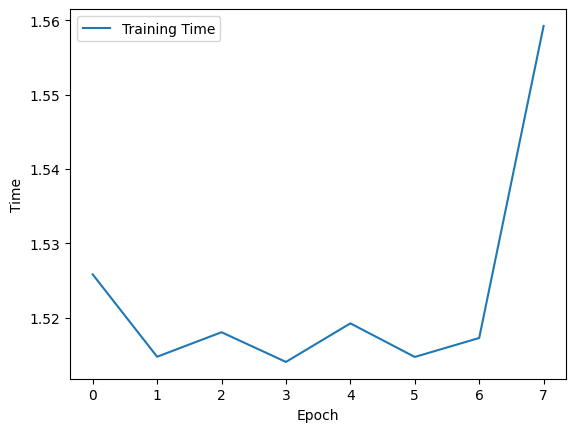

In [140]:
plt.plot(r, label='Training Time')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.legend()
plt.show()

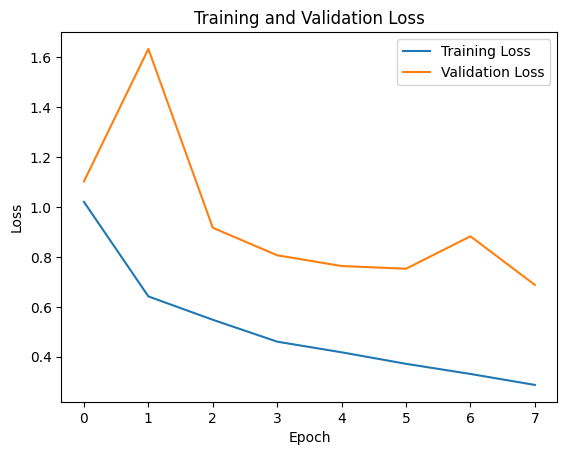

In [141]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.legend()
plt.show()




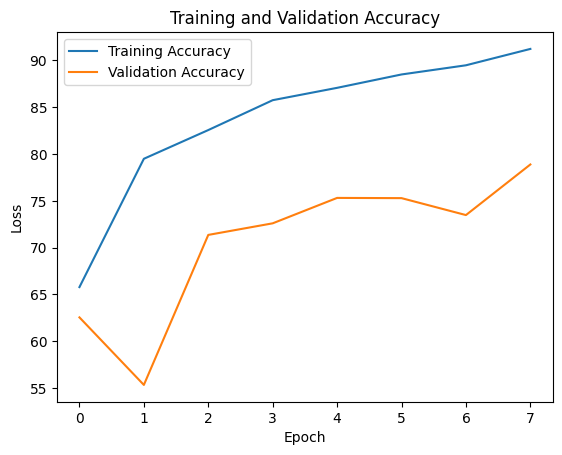

In [142]:
plt.plot(res_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.legend()
plt.show()

In [143]:
# Test the model on the test set
model = models.resnet50(pretrained=True)


model.fc = nn.Linear(model.fc.in_features, 10)

model.load_state_dict(torch.load('res_model.pt'))
model = model.to(device)
model.eval()
correct = 0
total = 0
y_probs_res = []
y_pred_res = []
y_true_res = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        y_probs_res.append(probabilities.cpu().numpy())
        y_pred_res.extend(predicted.cpu().numpy())
        y_true_res.extend(labels.cpu().numpy())

resnet_accuracy = correct / total * 100
print(f"Test Accuracy: {resnet_accuracy :.2f}%")

y_probs_res = np.concatenate(y_probs_res, axis=0)

Test Accuracy: 79.95%


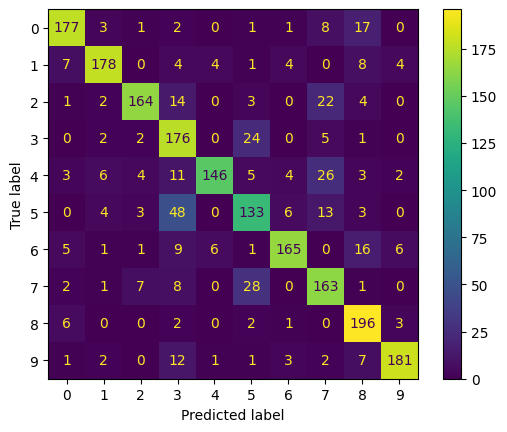

In [144]:
cm = confusion_matrix(y_true_res, y_pred_res)
ConfusionMatrixDisplay(cm).plot()

In [158]:
precision = precision_score(y_true_res, y_pred_res, average='macro')
recall = recall_score(y_true_res, y_pred_res, average='macro')
f1 = f1_score(y_true_res, y_pred_res, average='macro')

resnet = pd.DataFrame({
    "Resnet": ["Accuracy","Precision", "Recall", "F1 Score"],
    "Value": [resnet_accuracy/100,precision, recall, f1]
})

# Display the DataFrame
print(resnet)

      Resnet     Value
0   Accuracy  0.799524
1  Precision  0.815331
2     Recall  0.799524
3   F1 Score  0.801851


In [146]:
print("Shape of y_true_res_binary:", y_true_res_binary.shape)
print("Shape of y_probs_res:", y_probs_res.shape)


Shape of y_true_res_binary: (2100, 10)
Shape of y_probs_res: (2100, 10)


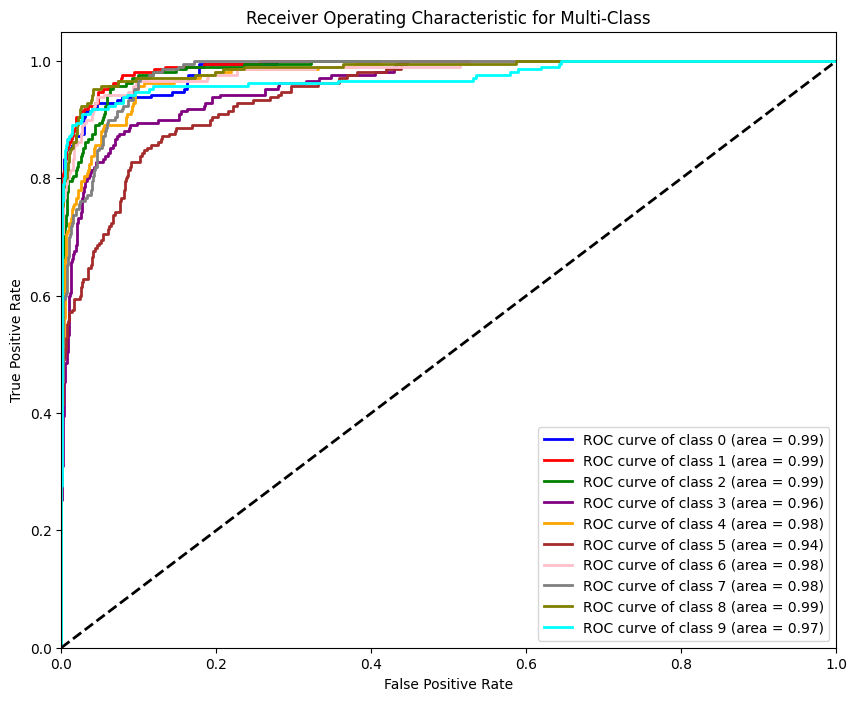

In [147]:
y_true_res_binary = label_binarize(y_true_res, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_res_binary[:, i], y_probs_res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [49]:
#target1 = torch.load('res_time.pt')
#res_train_loss = torch.load('res_train.pt')
#res_train_acc = torch.load('res_acc.pt')
#res_val_loss = torch.load('res_val.pt')
#res_val_acc = torch.load('res_val_acc.pt')
#res_time = torch.load('res_total.pt')
#res_epoch = torch.load('res_epoch.pt')

In [50]:
#plt.plot(res_train_loss, label='Training Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

# Plot training accuracy
#plt.plot(res_train_acc, label='Training Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()




In [51]:
#plt.plot(res_val_loss, label='Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

# Plot training accuracy
#plt.plot(res_val_acc, label='Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()





# VGG

In [52]:
# define a custom VGG model with regularization and dropout
class VGGWithRegularizationAndDropout(nn.Module):
    def __init__(self, num_classes, dropout_prob=0.5, weight_decay=5e-4): # weight_decay is the L2 regularization parameter, dropout_prob is the dropout probability
        super(VGGWithRegularizationAndDropout, self).__init__() # call the constructor of the parent class
        #self.history={'loss':[],'val_loss':[],'accuracy':[],'val_accuracy':[]}
        
        # Load the pre-trained VGG model
        vgg_model = models.vgg16(pretrained=True)  
        
       # retrieve the convolutional layers from the pre-trained VGG model
        self.features = vgg_model.features
        # checks if the parameter is a instance of BatchNorm2d, if true then set the parameter to be trainable
        for param in self.features.parameters():
            if isinstance(param, nn.BatchNorm2d):
                param.requires_grad = True  
        else:
            param.requires_grad = False  # Freeze the weights of convolutional layers and no update of the weights

         # initialize the weights of the first convolutional layer with Kaiming initialization
        #init.kaiming_normal_(self.features[0].weight, mode='fan_out', nonlinearity='relu') 
        # for layer in self.features:
        #     if isinstance(layer, nn.Conv2d):
        #         self.features.add_module(f'batchnorm_{layer}', nn.BatchNorm2d(layer.out_channels))

        # use adaptive average pooling to convert any input size to spatial size output size of (7, 7)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((7,7))
        
        # Add dropout to some convolutional layers
        # for layer in [0, 3, 7, 10, 14, 17, 21, 24, 28]:
        #     if isinstance(self.features[layer], nn.Conv2d): # check if the layer is a convolutional layer
        #         self.features[layer].add_module("dropout", nn.Dropout2d(p=dropout_prob)) # add dropout to the layer
        
        # customize fully connected layers with dropout
        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 128), # 512 * 7 * 7 is the number of input features to the first fully connected layer
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_prob),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_prob),
            nn.Linear(128, num_classes) # num_classes is the number of output features 
        )
        
        # apply L2 regularization or weight decay to fully connected layers with index 0, 3, and 6
        for layer in [0, 3, 6]:
            if isinstance(self.classifier[layer], nn.Linear):
                self.classifier[layer].weight.data.add_(weight_decay, self.classifier[layer].weight.data) # add L2 regularization to the weights in the layer

    # forward propagation
    def forward(self, x):
        x = self.features(x) # pass the input through the convolutional layers
        x = self.global_avg_pool(x) # pass the output of the convolutional layers through the global average pooling layer
        x = x.view(x.size(0), -1) # flatten the output of the convolutional layers and serves as the input to the fully connected layers in 1D
        x = self.classifier(x) # pass the input through the fully connected layers
        return x # return the output


# Instantiate the model
num_classes = len(train_dataset.classes)
model = VGGWithRegularizationAndDropout(num_classes=num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)


# Use the model for training
criterion = nn.CrossEntropyLoss() # use cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # use stochastic gradient descent with learning rate 0.001 to optimize the model parameters
#exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGGWithRegularizationAndDropout(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, str

C:\Users\PC\AppData\Local\Temp\ipykernel_17780\741921734.py:47: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1519.)
  self.classifier[layer].weight.data.add_(weight_decay, self.classifier[layer].weight.data) # add L2 regularization to the weights in the layer


In [53]:
# create a function to test the model
def test_model(model, validation_dataloader):
    total_samples = 0
    correct_predictions = 0
    running_loss = 0.0
    model.eval() # set the model to evaluation mode
    
    # disable gradient calculation, as we dont need it for inference
    with torch.no_grad():
        for data, target in validation_dataloader:  # iterate through the validation data
            data,target = data.to(device), target.to(device) # move the data to the device that will be used for validation
            output = model(data) # forward propagation
            loss = criterion(output, target) # calculate the loss
            running_loss += loss.item() # add the loss to the running loss
            _, predicted = torch.max(output, 1) # get the predicted class label
            correct_predictions += (predicted == target).sum().item() # get the number of correctly predicted samples
            total_samples += target.size(0) # get the total number of samples
    loss = running_loss / len(validation_dataloader) # calculate the average loss
    accuracy = correct_predictions / total_samples * 100 # calculate the accuracy
    val_loss_history.append(loss) # append the loss to the loss history
    val_accuracy_history.append(accuracy) # append the accuracy to the accuracy history
    return accuracy, loss # return the accuracy and loss


In [54]:
# create a list to store validation loss and accuracy history
val_loss_history=[] 
val_accuracy_history=[]

s = time.time()

v = []
# v_t = []
v_e = []
# Training loop
num_epochs = 30
model.train() # set the model to training mode
# create a list to store training loss and accuracy history
train_loss_history=[]
train_accuracy_history=[]
# initialize and start the timer

for epoch in range(num_epochs):
    start =time.time() 
    model.train() # set the model to training mode
    running_loss = 0.0  # keep track of the loss
    correct_predictions = 0 # keep track of the number of correct predictions
    total_samples = 0 # keep track of the number of samples
    for  inputs, labels in train_loader: # loop through the training dataloader
       
        inputs, labels =inputs.to(device), labels.to(device) # get the inputs and labels and move them to the device that will be used for training

        # Zero the parameter gradients to prevent accumulation of gradients from previous batches
        optimizer.zero_grad() 

        # Forward pass
        outputs = model(inputs) # pass the inputs through the model
        
        loss = criterion(outputs, labels) # calculate the loss
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # clip the gradient to prevent exploding gradient 
        # Backward pass and optimization
        loss.backward() 
        optimizer.step() # update the model parameters
        running_loss += loss.item() # add the loss to the running loss

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # get the predicted class with the highest score
        correct_predictions += (predicted == labels).sum().item() # get the number of correctly predicted samples
        total_samples += labels.size(0) # get the number of samples
        
    epoch_loss=running_loss/len(train_loader) # calculate the average loss per batch
    accuracy = correct_predictions / total_samples*100 # calculate the accuracy 
    #model.history['loss'].append(epoch_loss)
    #model.history['accuracy'].append(accuracy)
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(accuracy)
    # stop the timer
    end = time.time()
    
    # output the loss and accuracy for each epoch for training
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}', f'Accuracy: {accuracy}%')
    
    # test the model on the validation data
    accuracy_val,loss_val=test_model(model, val_loader)
    # output the loss and accuracy for each epoch for validation
    print(f'Epoch {epoch+1}/{num_epochs}, Loss_val: {loss_val}', f'Accuracy_val: {accuracy_val}%')
    
    e = end - start
    z = epoch+1
    v_e.append(z)
    minutes = e/60
    print(f'{minutes} minutes')
    v.append(minutes)
    print("")
    #model.history['val_loss'].append(loss_val)
    #model.history['val_accuracy'].append(accuracy_val)
    # apply early stopping, if the validation loss is not decreasing for 2 consecutive epochs, then stop training, monitoring the validation loss
    early_stopping=EarlyStopping(patience=2, verbose=True,monitor='loss_val')
    
    # early stopping when training loss is less than 0.1
    if epoch_loss<0.2:
        break

end_time = time.time() 
vgg_elasped = (end_time - s)/ 60
c = "{:.2f}".format(vgg_elasped)

# print(f'Training Time : {c} minutes')
print("Done training")

# torch.save(train_loss_history, 'vgg_train.pt')
# torch.save(train_accuracy_history, 'vgg_acc.pt')
# torch.save(val_loss_history, 'vgg_val.pt')
# torch.save(val_accuracy_history, 'vgg_val_acc.pt')
# torch.save(v, 'vgg_time.pt')
# torch.save(v_t, 'vgg_total.pt')
# torch.save(v_e, 'vgg_epoch.pt')

torch.save(model.state_dict(), 'vgg_model.pt')
print("Model Saved")

Epoch 1/30, Loss: 2.1949777196282927 Accuracy: 19.585034013605444%
Epoch 1/30, Loss_val: 1.717466097437974 Accuracy_val: 51.3095238095238%
12.311368195215861 minutes

Epoch 2/30, Loss: 1.2994887616323387 Accuracy: 55.986394557823125%
Epoch 2/30, Loss_val: 0.8611782549344229 Accuracy_val: 71.54761904761905%
12.308522760868073 minutes

Epoch 3/30, Loss: 0.7209023452323416 Accuracy: 76.04081632653062%
Epoch 3/30, Loss_val: 0.6216120968544574 Accuracy_val: 78.85714285714286%
12.286917134126027 minutes

Epoch 4/30, Loss: 0.46479714977676456 Accuracy: 84.65986394557822%
Epoch 4/30, Loss_val: 0.54367159366269 Accuracy_val: 82.33333333333334%
12.29318618774414 minutes

Epoch 5/30, Loss: 0.3412705448334632 Accuracy: 88.74829931972789%
Epoch 5/30, Loss_val: 0.46897184857251967 Accuracy_val: 85.59523809523809%
12.309489011764526 minutes

Epoch 6/30, Loss: 0.25937175460807654 Accuracy: 91.5578231292517%
Epoch 6/30, Loss_val: 0.4360766307076891 Accuracy_val: 87.09523809523809%
12.28530334631602 min

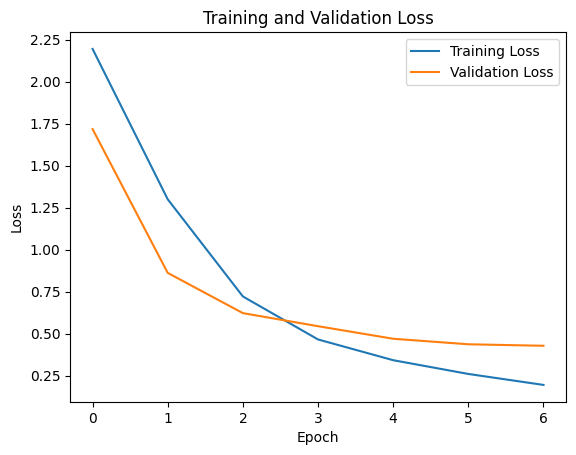

In [57]:
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.legend()
plt.show()

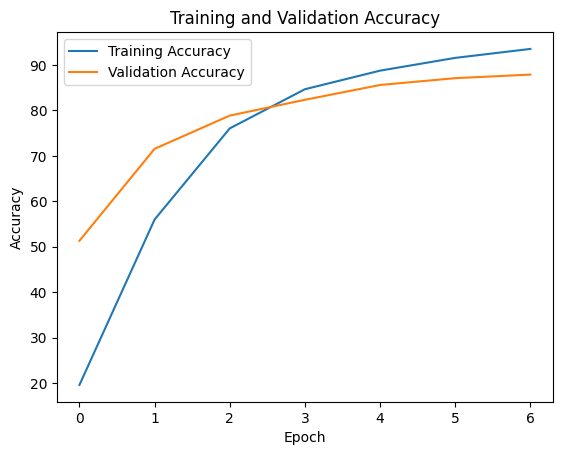

In [66]:
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.legend()
plt.show()

In [167]:
# test the model on the test data, same concept as testing on the validation data
model = VGGWithRegularizationAndDropout(num_classes=num_classes)
model = model.to(device)
model.load_state_dict(torch.load('vgg_model.pt'))
model.eval()

total_samples = 0
correct_predictions = 0
running_loss = 0

y_true = []
y_pred = []

with torch.no_grad():
        for data, target in test_loader:
            data,target = data.to(device),target.to(device)
            output = model(data)
            loss = criterion(output, target)
            running_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == target).sum().item()
            total_samples += target.size(0)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(target.cpu().numpy())
            
        loss = running_loss / len(test_loader)
        vgg_accuracy = correct_predictions / total_samples * 100
print(f'Loss_test: {loss},Accuracy_test: {vgg_accuracy}%')


C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\anaconda3\envs\cuda11.2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loss_test: 0.416656778063484,Accuracy_test: 89.33333333333333%


In [168]:
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

vgg = pd.DataFrame({
    "VGG": ["Accuracy","Precision", "Recall", "F1 Score"],
    "Value": [vgg_accuracy/100,precision, recall, f1]
})

# Display the DataFrame
print(vgg)

         VGG     Value
0   Accuracy  0.893333
1  Precision  0.896543
2     Recall  0.893333
3   F1 Score  0.893089


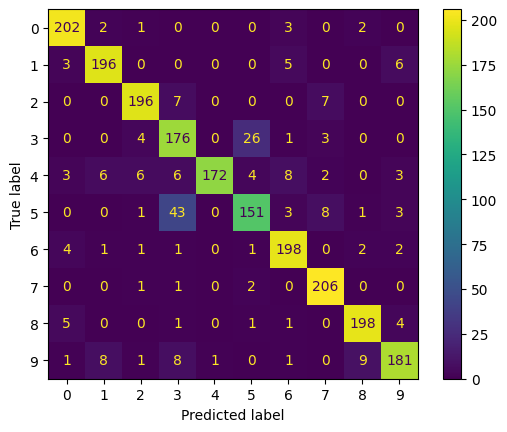

In [169]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [61]:
# target3 = torch.load('vgg_time.pt')
# vgg_train_loss = torch.load('vgg_train.pt')
# vgg_train_acc = torch.load('vgg_acc.pt')
# vgg_val_loss = torch.load('vgg_val.pt')
# vgg_val_acc = torch.load('vgg_val_acc.pt')
# vgg_time = torch.load('vgg_total.pt')
# vgg_epoch = torch.load('vgg_epoch.pt')

In [62]:
# plt.plot(target3, label='Training Time')
# plt.xlabel('Epoch')
# plt.ylabel('Time')
# plt.legend()
# plt.show()

In [63]:
# plt.plot(train_loss_history, label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot training accuracy
# plt.plot(train_acc_accuracy, label='Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [64]:
# plt.plot(vgg_val_loss, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot training accuracy
# plt.plot(vgg_val_acc, label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Result

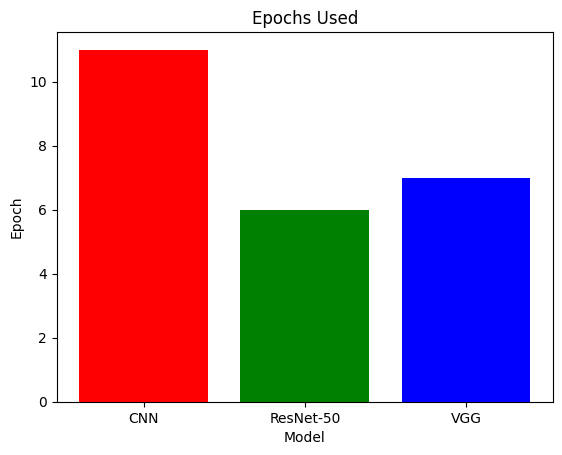

In [67]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [c_e[-1], r_e[-1], v_e[-1]] 
  
# labels for bars 
tick_label = ['CNN', 'ResNet-50', 'VGG'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','blue']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Epoch') 
# plot title 
plt.title('Epochs Used') 
  
# function to show the plot 
plt.show() 

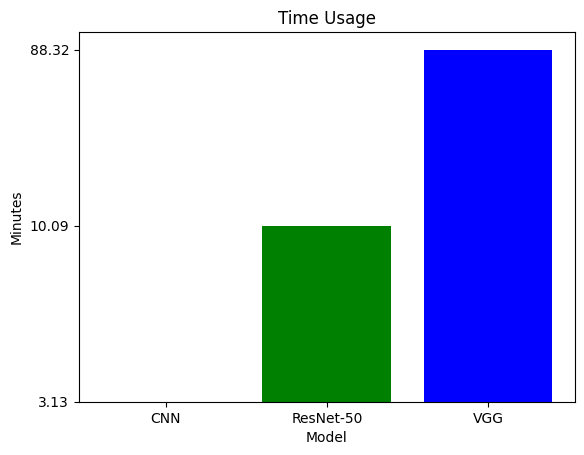

In [80]:
# x-coordinates of left sides of bars
left = [1, 2, 3]

# heights of bars (replace a, b, c with actual values)
height = [a, b, c]

#find maximum of height
maximum = float(max(height))
#float h = maximum + 1

# labels for bars
tick_label = ['CNN', 'ResNet-50', 'VGG']

# plotting a bar chart
plt.bar(left, height, tick_label=tick_label, width=0.8, color=['red', 'green', 'blue'])

# naming the x-axis
plt.xlabel('Model')

# setting the y-axis to start at 0
plt.ylim(bottom = 0)

# naming the y-axis
plt.ylabel('Minutes')

# plot title
plt.title('Time Usage')

# function to show the plot
plt.show()

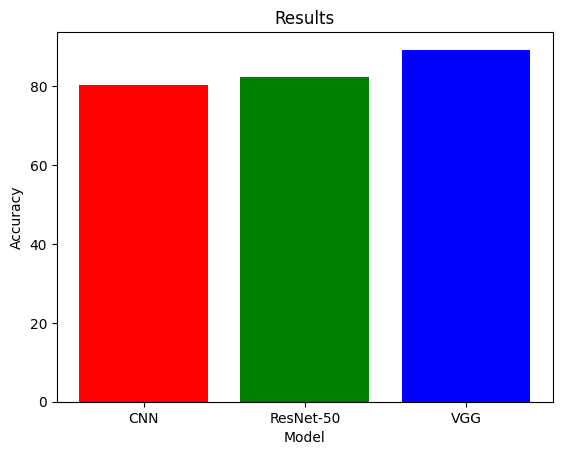

In [81]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [cnn_accuracy, resnet_accuracy, vgg_accuracy] 
  
# labels for bars 
tick_label = ['CNN', 'ResNet-50', 'VGG'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','blue']) 
  
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Results') 
  
# function to show the plot 
plt.show() 

In [83]:
# Create a DataFrame
result = pd.DataFrame({
    "Model": ["CNN", "ResNet", "VGG"],
    "Value": [cnn_accuracy, resnet_accuracy, vgg_accuracy]
})

# Display the DataFrame
print(result)


    Model      Value
0     CNN  80.380952
1  ResNet  82.285714
2     VGG  89.333333
